In [29]:
import sys
sys.path.append('../../build')
sys.path.append('../')
import IPSModule as ips
import helpers as hp
from utils import SimulationVisualizer
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import lattpy as lp

In [30]:
import importlib
importlib.reload(hp)

TypeError: 'type' object is not subscriptable

In [50]:
def initialise_langevin_simulator(gamma = 1, temperature = 0.2, rad = 15.0, epsilon = 1.0, sigma = 1.0):
    # Set up 2 particle system, with particles sitting just at the boundary
    init_dis = 2 ** (1.0 / 6.0) * sigma

    num_particles = 2
    init_particles_positions = [[0, 0], [init_dis+0.01, 0]]
    particles = ips.Particles(num_particles)
    particles.positions = init_particles_positions

    # # set the initial positions in our system
    # for i in range(num_particles):
    #     for d in range(2):
    #         particles.get_positions()[d][i] = init_particles_positions[i][d]
    #         particles.get_velocities()[d][i] = 0.0

    pair_force_config = {
        "type": "LennardJones",
        "eps": epsilon,
        "sigma": sigma
    }

    confinement_config = {
        "type": "Radial",
        "rad": rad
    }
    simulator = ips.IPS_Simulator(particles)
    simulator.init(pair_force_config, confinement_config)

    return particles, simulator

In [32]:
def langevin_integrator(h, n_steps, sigma):
    particles, simulator = initialise_langevin_simulator(sigma=sigma)
    simulator.integrate_n_steps(h, n_steps)
    final_positions = particles.get_positions()
    trajects = [np.array([final_position]) for final_position in final_positions]
    return trajects

In [33]:
sigmas = np.linspace(0.1, 2, 10)

In [34]:
thresholds = [None] * len(sigmas)
for i, sigma in enumerate(sigmas):
    print(f"{sigma=}")
    integrator = lambda h, n_steps: langevin_integrator(h, n_steps, sigma)
    thresholds[i] = hp.get_stability_threshold(integrator, h_init=1, n_integration_steps = 100000, verbose = False)

sigma=0.1
sigma=0.3111111111111111
sigma=0.5222222222222223
sigma=0.7333333333333333
sigma=0.9444444444444444
sigma=1.1555555555555557
sigma=1.3666666666666667
sigma=1.577777777777778
sigma=1.788888888888889
sigma=2.0


In [35]:
def V(r, eps, sigma):
    return 4*eps*((sigma/r)**12-(sigma/r)**6)

def V_prime(r, eps, sigma):
    return 4*eps*(-12*(sigma)**12*r**(-13) + 6*sigma**6*r**(-7))

def v_pprime(r, eps, sigma):
    return 4*eps*(156*sigma**12*r**(-14) - 42*sigma**6*r^(-8))

def v_pprime_atmin(eps, sigma):
    return 4*eps/(sigma**2)*(2**(-7/3)*156 - 2**(-4/3)*42)

In [ ]:
def derivative(f, x):
    # centred difference
    h = 1e-5
    return (f(x+h)-f(x-h))/(2*h)

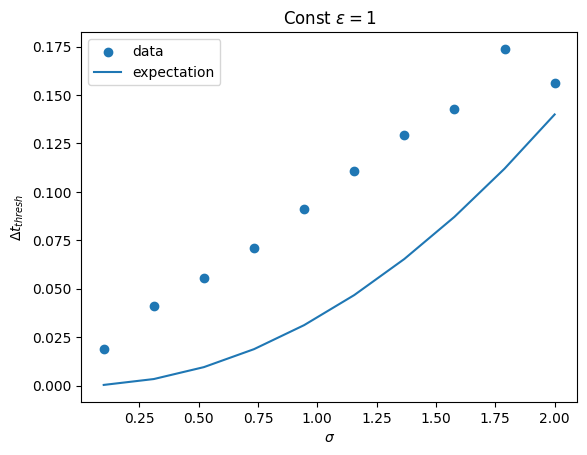

In [36]:
plt.scatter(sigmas, thresholds, label = "data")

pred_freqs = np.array([v_pprime_atmin(1, sigma) for sigma in sigmas])
plt.plot(sigmas, 2/pred_freqs, label = "expectation")
plt.xlabel("$\sigma$")
plt.ylabel(r"$\Delta t_{thresh}$")
plt.legend()
plt.title("Const $\epsilon = 1$")
plt.show()

In [38]:
help(ips)

Help on module IPSModule:

NAME
    IPSModule - IPS module: Provides interfaces for the IPS simulator.

DESCRIPTION
    This module supports several simulator classes:
      - IPS_Simulator (using the LeapFrog integrator and Particles system)
      - IPS_Simulator_Langevin (using the ABOBA integrator and LangevinSystem)
      - IPS_Simulator_NoseHoover (using the NoseHoover integrator and NoseHooverSystem)
      - IPS_Simulator_NoseHooverLangevin (using the NoseHooverLangevin integrator and NoseHooverLangevinSystem)
    
    Corresponding particle systems include: Particles, LangevinSystem, NoseHooverSystem, and NoseHooverLangevinSystem.
    
    Example usage:
        >>> from IPSModule import IPS_Simulator
        >>> simulator = IPS_Simulator(particles)
        >>> simulator.init({'force_type': 'pair'}, {'confinement': 'type1'})
        >>> simulator.integrate_n_steps(100)

CLASSES
    pybind11_builtins.pybind11_object(builtins.object)
        IPS_Simulator
        IPS_Simulator_Lan

In [41]:
help(ips.IPS_Simulator)

Help on class IPS_Simulator in module IPSModule:

class IPS_Simulator(pybind11_builtins.pybind11_object)
 |  IPS_Simulator class for performing simulations using the LeapFrog integrator on a Particles system.
 |  
 |  This simulator supports setting up pair forces and confinement forces.
 |  
 |  Method resolution order:
 |      IPS_Simulator
 |      pybind11_builtins.pybind11_object
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(...)
 |      __init__(self: IPSModule.IPS_Simulator, arg0: Particles<(DataLayout)0, 2ul>) -> None
 |      
 |      Construct an IPS_Simulator object.
 |      
 |      Parameters:
 |          particles (Particles): A collection of particles using a Structure of Arrays (SoA) layout in 2D.
 |  
 |  init(...)
 |      init(self: IPSModule.IPS_Simulator, arg0: dict, arg1: dict) -> None
 |      
 |      Initialize the simulator with configurations for inter-particle forces and confinement forces.
 |      
 |      Parameters:
 |          pair

In [53]:
sigma = 1
init_dis = 2 ** (1.0 / 6.0) * sigma

num_particles = 2
init_particles_positions = [[0, 0], [init_dis+0.01, 0]]
particles = ips.Particles(num_particles)
particles.positions = init_particles_positions

# # set the initial positions in our system
# for i in range(num_particles):
#     for d in range(2):
#         particles.get_positions()[d][i] = init_particles_positions[i][d]
#         particles.get_velocities()[d][i] = 0.0

pair_force_config = {
    "type": "LennardJones",
    "eps": 1,
    "sigma": sigma
}

confinement_config = {
    "type": "Radial",
    "rad": 10
}
simulator = ips.IPS_Simulator(particles)
simulator.init(pair_force_config, confinement_config)

RuntimeError: Unexpected index

In [54]:
simulator.init({'force_type': 'pair'}, {'confinement': 'type1'})